<h1> EDA - Consumer Trends Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Consumer.csv")
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,sales_channel
0,I138884,10/30/2023 9:58,C241288,Female,28,Rubber Flooring,5,1500.40,1425.380,South,Kentucky,Kanyon
1,I317333,10/30/2023 9:58,C111565,Male,21,Sheet Rubber,3,1800.51,1620.459,South,Kentucky,Harbor Freight Tools
2,I127801,10/30/2023 9:58,C266599,Male,20,Rubber Flooring,1,300.08,295.060,West,California,Walmart
3,I173702,10/30/2023 9:58,C988172,Female,66,Sheet Rubber,5,3000.85,2900.765,South,Florida,Home Depot
4,I337046,10/30/2023 9:59,C189076,Female,53,Doormats,4,60.60,45.450,South,Florida,Kanyon


In [3]:
total_profit = df['profit'] = (df['selling_price_per_unit'] - df['cost_price_per_unit']) * df['quantity']
total_profit

0         375.1000
1         540.1530
2           5.0200
3         500.4250
4          60.6000
           ...    
99452      73.3125
99453       6.2760
99454       6.2760
99455    1680.0000
99456      31.6710
Length: 99457, dtype: float64

<h1> Total sales by region

In [4]:
# Group by region and calculate the total sales
total_sales_by_region = df.groupby('region')['selling_price_per_unit'].sum().reset_index()

# Descending order
total_sales_by_region = total_sales_by_region.sort_values(by='selling_price_per_unit', ascending=False).reset_index(drop=True)
total_sales_by_region['selling_price_per_unit'] = total_sales_by_region['selling_price_per_unit'].map('{:.2f}'.format)
total_sales_by_region


,region,selling_price_per_unit
0,West,21733560.38
1,East,19728186.37
2,Central,15997848.96
3,South,11091770.20


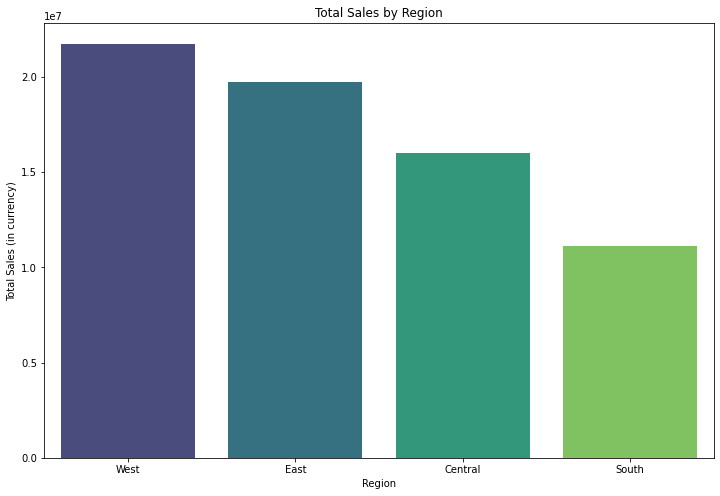

In [5]:
total_sales_by_region['selling_price_per_unit'] = total_sales_by_region['selling_price_per_unit'].astype(float)

plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='selling_price_per_unit', data=total_sales_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in currency)')
plt.show()

<h1> Profit Analysis by Product Category

In [6]:
# Group by category and calculate the total profit
total_profit_by_category = df.groupby('category')['profit'].sum().reset_index()

# Descending order
total_profit_by_category = total_profit_by_category.sort_values(by='profit', ascending=False).reset_index(drop=True)
total_profit_by_category['profit'] = total_profit_by_category['profit'].map('{:.2f}'.format)
total_profit_by_category


,category,profit
0,Rubber Flooring,11510653.40
1,Natural Gum Rubber,6268657.50
2,Sheet Rubber,5858519.73
3,Flexible Ducting,1475541.08
4,Doormats,1084021.55
5,Specialty Products,223243.55
6,Rubber Mats,167470.15


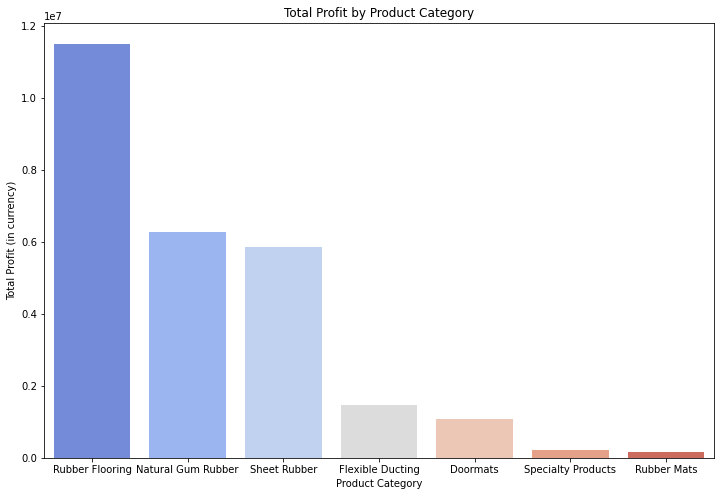

In [7]:
total_profit_by_category['profit'] = total_profit_by_category['profit'].astype(float)

plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='profit', data=total_profit_by_category, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit (in currency)')
plt.show()

# Top Selling Products by Quantity

In [8]:
top_products_by_quantity = df.groupby('category')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()
top_products_by_quantity

,category,quantity
0,Rubber Flooring,103598
1,Flexible Ducting,45501
2,Doormats,45310
3,Specialty Products,44281
4,Sheet Rubber,30217


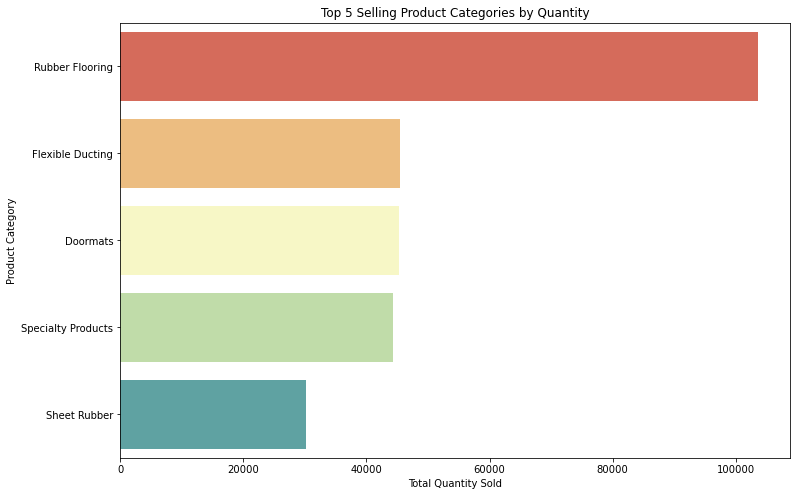

In [9]:
top_products_by_quantity['quantity'] = top_products_by_quantity['quantity'].astype(float)

plt.figure(figsize=(12, 8))
sns.barplot(x='quantity', y='category', data=top_products_by_quantity, palette='Spectral')
plt.title('Top 5 Selling Product Categories by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

<h1> Calculate average spend per customer by gender

In [10]:
average_spend_by_gender = df.groupby('gender')['selling_price_per_unit'].mean().reset_index()
average_spend_by_gender

,gender,selling_price_per_unit
0,Female,688.137615
1,Male,690.920933


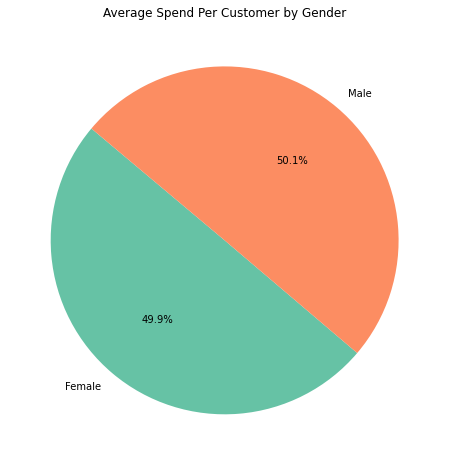

In [11]:
plt.figure(figsize=(8, 8))

plt.pie(
    average_spend_by_gender['selling_price_per_unit'], 
    labels=average_spend_by_gender['gender'], 
    autopct='%1.1f%%',  # Display percentage values with one decimal place
    colors=sns.color_palette('Set2'),
    startangle=140
)
plt.title('Average Spend Per Customer by Gender')
plt.show()

# Sales Contribution by Gender

In [12]:
sales_by_gender = df.groupby('gender')['selling_price_per_unit'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format
sales_by_gender

,gender,selling_price_per_unit
0,Female,"40,931,801.62"
1,Male,"27,619,564.29"


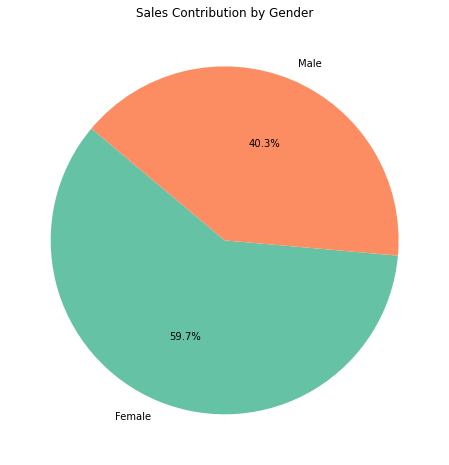

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_gender['selling_price_per_unit'], 
    labels=sales_by_gender['gender'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('Set2')
)
plt.title('Sales Contribution by Gender')
plt.show()

<h1> Calculate daily sales

In [14]:
daily_sales = df.groupby('invoice_date')['selling_price_per_unit'].sum().reset_index()
daily_sales

,invoice_date,selling_price_per_unit
0,10/30/2023 10:00,"1,669.37"
1,10/30/2023 10:01,"4,231.47"
2,10/30/2023 10:02,"1,059.29"
3,10/30/2023 10:03,"5,931.14"
4,10/30/2023 10:04,"4,598.15"
...,...,...
23202,11/9/2023 9:55,"1,531.78"
23203,11/9/2023 9:56,"3,658.34"
23204,11/9/2023 9:57,"1,500.40"
23205,11/9/2023 9:58,"3,982.40"


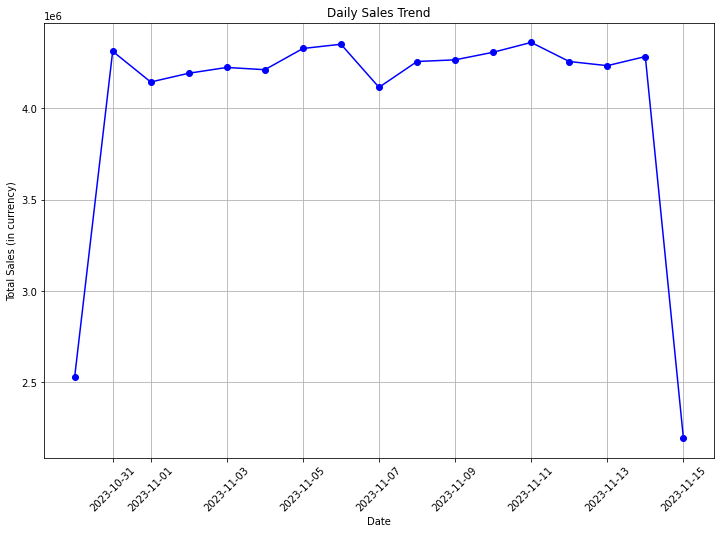

In [15]:
daily_sales['invoice_date'] = pd.to_datetime(daily_sales['invoice_date'])

# Extract only the date part and aggregate data
daily_sales['date_only'] = daily_sales['invoice_date'].dt.date  # Keep only the date part
daily_sales_grouped = daily_sales.groupby('date_only', as_index=False)['selling_price_per_unit'].sum()

plt.figure(figsize=(12, 8))
plt.plot(daily_sales_grouped['date_only'], daily_sales_grouped['selling_price_per_unit'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (in currency)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1> Most popular product categories by gender

In [16]:
quantity_by_category_gender = df.groupby(['category', 'gender'])['quantity'].sum().unstack().reset_index()
quantity_by_category_gender

gender,category,Female,Male
0,Doormats,27145,18165
1,Flexible Ducting,27277,18224
2,Natural Gum Rubber,8977,6056
3,Rubber Flooring,62062,41536
4,Rubber Mats,8976,5895
5,Sheet Rubber,17906,12311
6,Specialty Products,26362,17919


<Figure size 864x576 with 0 Axes>

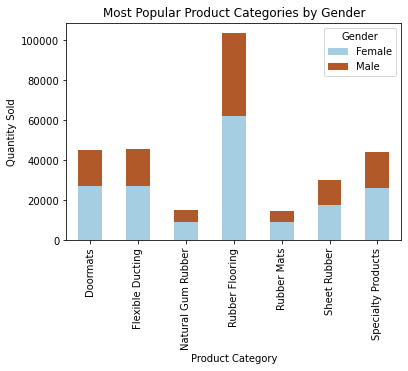

In [17]:
plt.figure(figsize=(12, 8))
quantity_by_category_gender.plot(x='category', kind='bar', stacked=True, colormap='Paired')
plt.title('Most Popular Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.legend(title='Gender')
plt.show()

<h1> Profit Margin by Product Category

In [18]:
df['profit_margin'] = (df['profit'] / (df['cost_price_per_unit'] * df['quantity'])) * 100
profit_margin_by_category = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False).reset_index()
profit_margin_by_category

,category,profit_margin
0,Rubber Mats,39.20
1,Specialty Products,39.07
2,Doormats,35.48
3,Flexible Ducting,33.74
4,Rubber Flooring,22.10
5,Sheet Rubber,14.24
6,Natural Gum Rubber,12.43


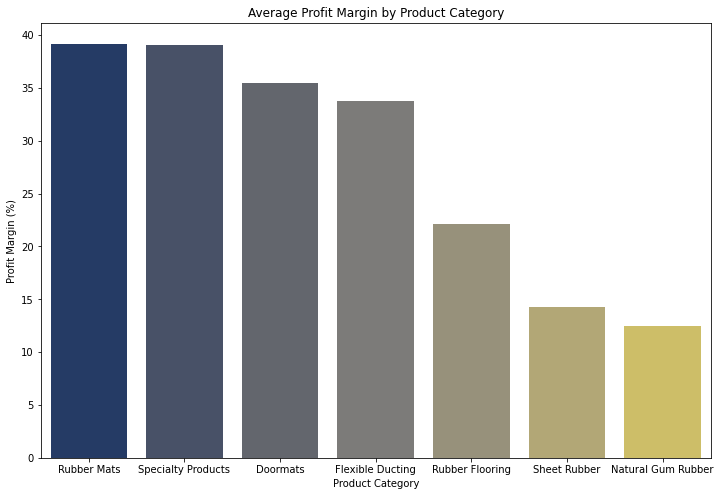

In [19]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='category', y='profit_margin', data=profit_margin_by_category, palette='cividis')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.show()

<h1> Customer Age Distribution

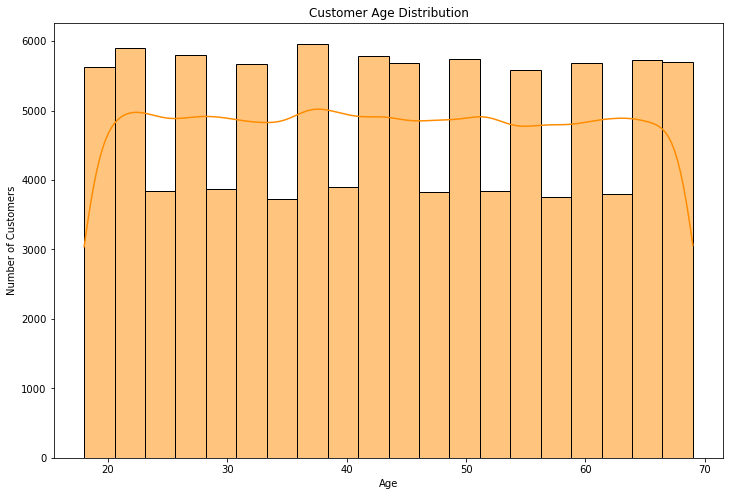

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(df['age'], bins=20, kde=True, color='darkorange')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

<h1> Sales by State

In [21]:
total_sales_by_state = df.groupby('state')['selling_price_per_unit'].sum().sort_values(ascending=False).reset_index()
total_sales_by_state

,state,selling_price_per_unit
0,California,"13,088,362.01"
1,New York,"8,008,417.68"
2,Texas,"6,808,171.05"
3,Pennsylvania,"4,113,482.19"
4,Illinois,"3,431,141.85"
5,Washington,"3,427,124.74"
6,Ohio,"3,131,549.37"
7,Iowa,"3,061,924.93"
8,Delaware,"2,601,148.24"
9,Florida,"2,585,157.63"


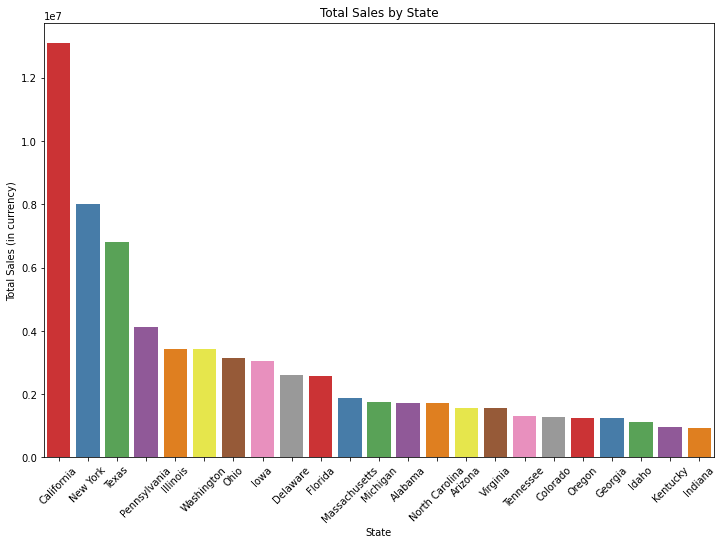

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='selling_price_per_unit', data=total_sales_by_state, palette='Set1')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales (in currency)')
plt.xticks(rotation=45)
plt.show()

<h1> Gender Distribution by Sales Channel

In [23]:
gender_distribution = df.groupby(['sales_channel', 'gender']).size().unstack().reset_index()
gender_distribution

gender,sales_channel,Female,Male
0,Harbor Freight Tools,6174,4034
1,Home Depot,14958,9975
2,Kanyon,11906,7917
3,Lowe's,11513,7795
4,Official Website,5990,4184
5,Walmart,8941,6070


<Figure size 864x576 with 0 Axes>

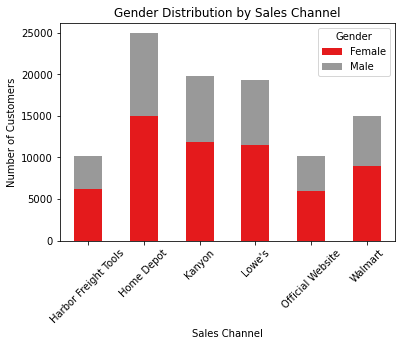

In [24]:
plt.figure(figsize=(12, 8))
gender_distribution.plot(x='sales_channel', kind='bar', stacked=True, colormap='Set1')
plt.title('Gender Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<h1> High-Profit Transactions

In [25]:
top_profit_transactions = df.sort_values(by='profit', ascending=False).head(10)
top_profit_transactions

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,sales_channel,profit,profit_margin
100,I283443,10/30/2023 10:21,C189493,Male,43,Natural Gum Rubber,15,"3,150.00","2,677.50",Central,Illinois,Harbor Freight Tools,"7,087.50",17.65
81594,I102703,11/12/2023 15:16,C110600,Female,40,Natural Gum Rubber,5,"5,250.00","4,725.00",Central,Texas,Lowe's,"2,625.00",11.11
24615,I235578,11/3/2023 9:41,C191360,Male,21,Natural Gum Rubber,5,"5,250.00","4,725.00",East,Ohio,Home Depot,"2,625.00",11.11
61476,I540388,11/9/2023 9:02,C292989,Female,58,Natural Gum Rubber,5,"5,250.00","4,725.00",South,North Carolina,Home Depot,"2,625.00",11.11
68229,I260755,11/10/2023 11:18,C219246,Male,59,Natural Gum Rubber,5,"5,250.00","4,725.00",Central,Texas,Home Depot,"2,625.00",11.11
7792,I338099,10/31/2023 16:16,C106117,Female,58,Natural Gum Rubber,5,"5,250.00","4,725.00",Central,Texas,Harbor Freight Tools,"2,625.00",11.11
7791,I668520,10/31/2023 16:16,C908608,Female,35,Natural Gum Rubber,5,"5,250.00","4,725.00",Central,Illinois,Kanyon,"2,625.00",11.11
63184,I171712,11/9/2023 15:41,C223731,Female,65,Natural Gum Rubber,5,"5,250.00","4,725.00",Central,Illinois,Walmart,"2,625.00",11.11
43979,I256734,11/6/2023 12:59,C585144,Female,24,Natural Gum Rubber,5,"5,250.00","4,725.00",East,New York,Walmart,"2,625.00",11.11
2873,I883022,10/30/2023 21:08,C186458,Female,68,Natural Gum Rubber,5,"5,250.00","4,725.00",West,California,Home Depot,"2,625.00",11.11


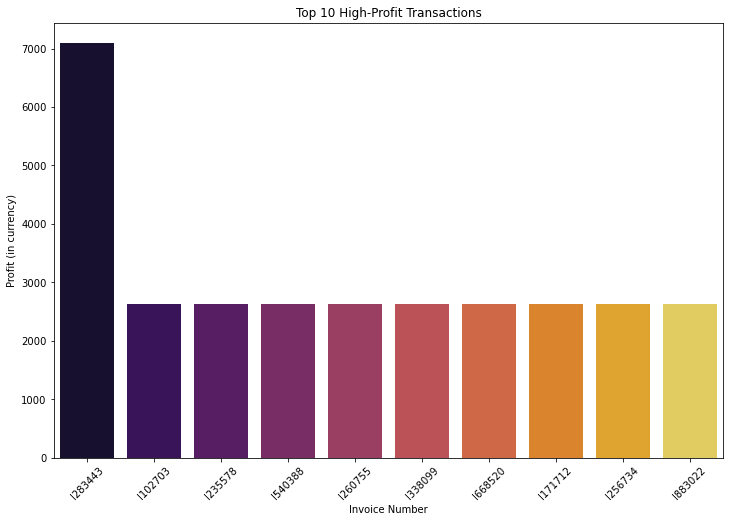

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='invoice_no', y='profit', data=top_profit_transactions, palette='inferno')
plt.title('Top 10 High-Profit Transactions')  
plt.xlabel('Invoice Number')                 
plt.ylabel('Profit (in currency)')          
plt.xticks(rotation=45)
plt.show()

<h1> Relationship Between Selling Price and Cost Price

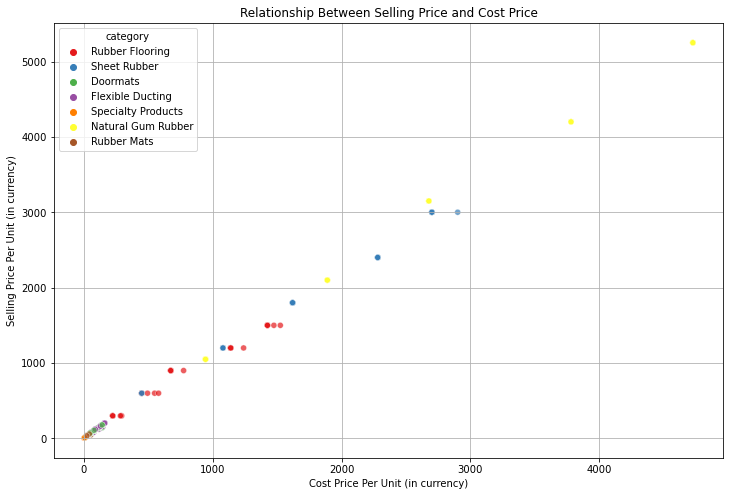

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='cost_price_per_unit', y='selling_price_per_unit', data=df, hue='category', palette='Set1', alpha=0.7)
plt.title('Relationship Between Selling Price and Cost Price')
plt.xlabel('Cost Price Per Unit (in currency)')
plt.ylabel('Selling Price Per Unit (in currency)')
plt.grid(True)
plt.show()

<h1> Top 5 States by Profit

In [28]:
profit_by_state = df.groupby('state')['profit'].sum().sort_values(ascending=False).head(5).reset_index()
profit_by_state

,state,profit
0,California,"5,091,156.81"
1,New York,"3,102,231.55"
2,Texas,"2,626,597.28"
3,Pennsylvania,"1,599,582.62"
4,Illinois,"1,332,294.64"


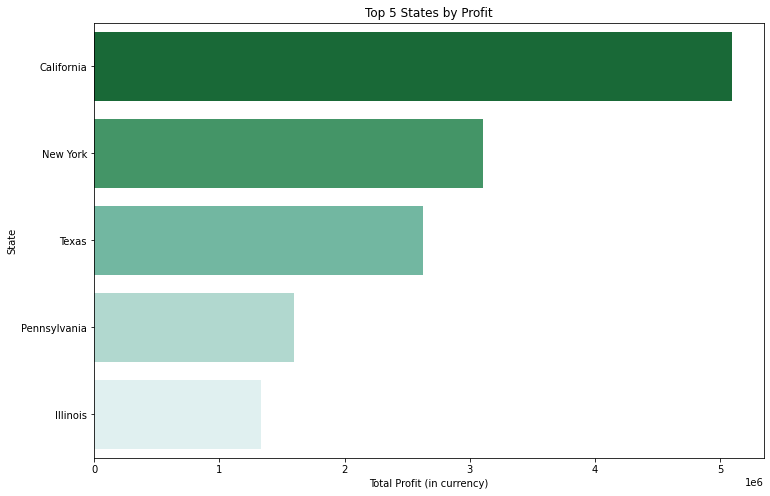

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='state', data=profit_by_state, palette='BuGn_r')
plt.title('Top 5 States by Profit')
plt.xlabel('Total Profit (in currency)')
plt.ylabel('State')
plt.show()

<h1> Customer lifetime value

In [30]:
cltv = df.groupby('customer_id')['selling_price_per_unit'].sum().reset_index()
cltv

,customer_id,selling_price_per_unit
0,C100004,"1,500.40"
1,C100005,"1,200.34"
2,C100006,107.52
3,C100012,26.15
4,C100019,35.84
...,...,...
99452,C999886,15.69
99453,C999910,45.45
99454,C999974,"1,500.40"
99455,C999976,107.52


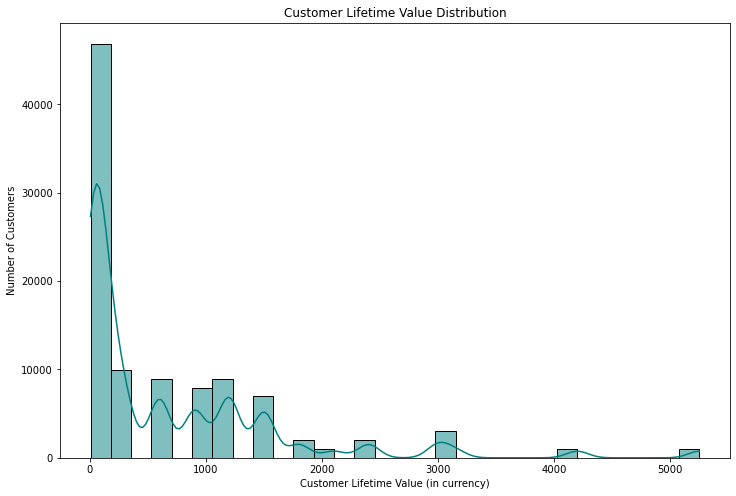

In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(cltv['selling_price_per_unit'], bins=30, kde=True, color='teal')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Customer Lifetime Value (in currency)')
plt.ylabel('Number of Customers')
plt.show()

<h1> Repeat Customers vs One-Time Customers

In [32]:
transactions_per_customer = df.groupby('customer_id').size().reset_index(name='transaction_count')
repeat_customers = transactions_per_customer[transactions_per_customer['transaction_count'] > 1].shape[0]
one_time_customers = transactions_per_customer[transactions_per_customer['transaction_count'] == 1].shape[0]

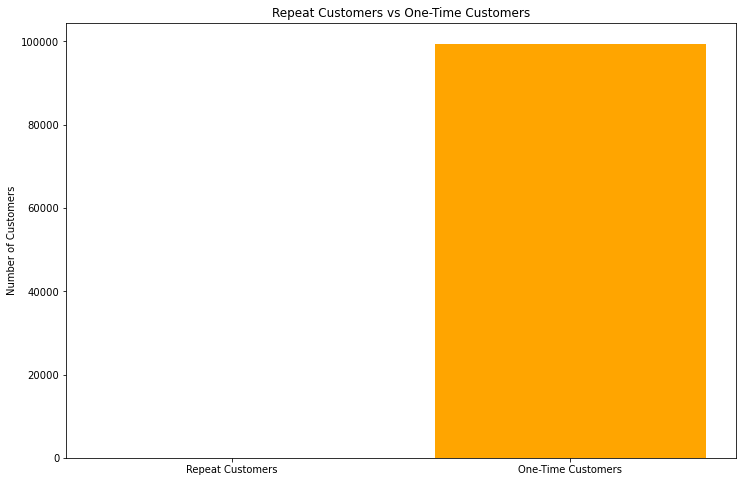

In [33]:
plt.figure(figsize=(12, 8))
plt.bar(['Repeat Customers', 'One-Time Customers'], [repeat_customers, one_time_customers], color=['royalblue', 'orange'])
plt.title('Repeat Customers vs One-Time Customers')
plt.ylabel('Number of Customers')
plt.show()

<h1> Correlation Between Age and Spending

In [34]:
spending_age_correlation = df.groupby('customer_id').agg({'selling_price_per_unit': 'sum', 'age': 'first'}).reset_index()
spending_age_correlation

,customer_id,selling_price_per_unit,age
0,C100004,"1,500.40",61
1,C100005,"1,200.34",34
2,C100006,107.52,44
3,C100012,26.15,25
4,C100019,35.84,21
...,...,...,...
99452,C999886,15.69,61
99453,C999910,45.45,41
99454,C999974,"1,500.40",29
99455,C999976,107.52,49


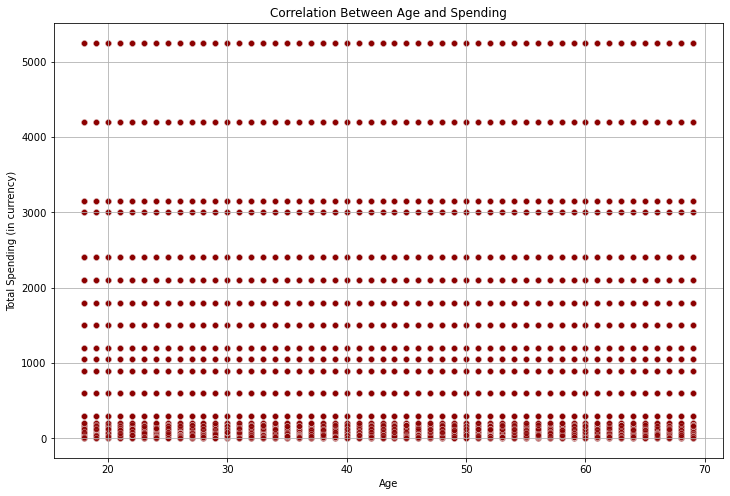

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='selling_price_per_unit', data=spending_age_correlation, color='darkred', alpha=0.6)
plt.title('Correlation Between Age and Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending (in currency)')
plt.grid(True)
plt.show()

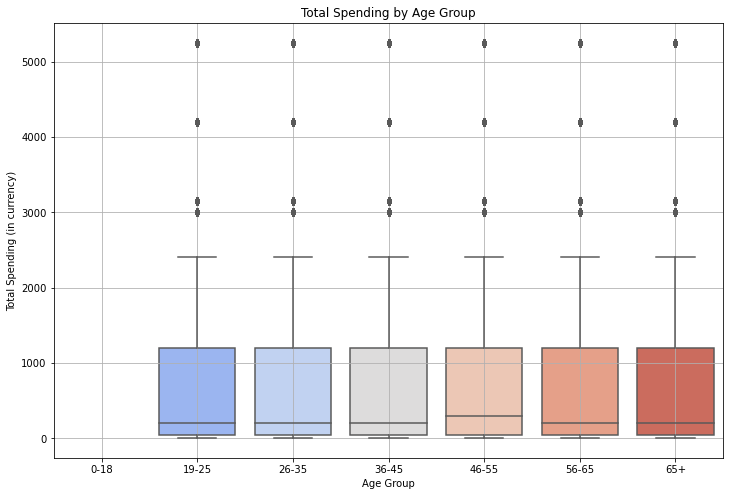

In [36]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
spending_age_correlation['age_group'] = pd.cut(spending_age_correlation['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='selling_price_per_unit', data=spending_age_correlation, palette='coolwarm')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending (in currency)')
plt.grid(True)
plt.show()

<h1> Time to First Purchase
<h4> This insight identifies how long it takes for customers to make their first purchase from the dataset's initial date.

In [37]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Retrieve the first purchase date for each customer
first_purchase = df.groupby('customer_id')['invoice_date'].min().reset_index()
first_purchase['days_to_first_purchase'] = (first_purchase['invoice_date'] - df['invoice_date'].min()).dt.days
first_purchase.head()

,customer_id,invoice_date,days_to_first_purchase
0,C100004,2023-11-06 06:03:00,6
1,C100005,2023-11-12 11:15:00,13
2,C100006,2023-11-01 12:47:00,2
3,C100012,2023-11-08 02:21:00,8
4,C100019,2023-10-31 01:48:00,0


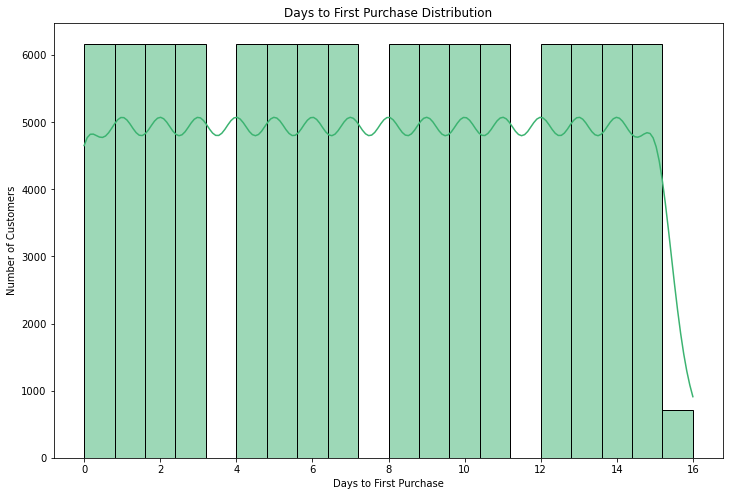

In [38]:
plt.figure(figsize=(12, 8))
sns.histplot(first_purchase['days_to_first_purchase'], bins=20, kde=True, color='mediumseagreen')
plt.title('Days to First Purchase Distribution')
plt.xlabel('Days to First Purchase')
plt.ylabel('Number of Customers')
plt.show()

<h1> Basket Size Analysis
<h4> Basket size refers to the number of items a customer purchases in a single transaction.

In [39]:
basket_size = df.groupby('invoice_no')['quantity'].sum().reset_index()
basket_size

,invoice_no,quantity
0,I100008,5
1,I100014,5
2,I100015,2
3,I100024,3
4,I100027,4
...,...,...
99452,I999956,4
99453,I999959,4
99454,I999972,2
99455,I999973,1


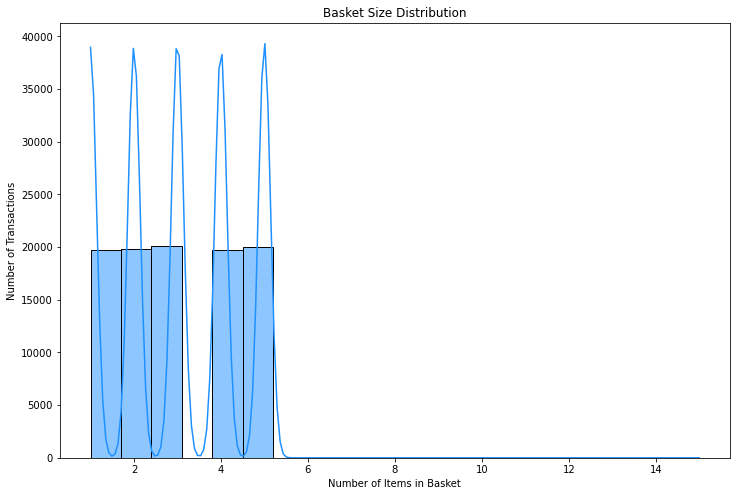

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot(basket_size['quantity'], bins=20, kde=True, color='dodgerblue')
plt.title('Basket Size Distribution')
plt.xlabel('Number of Items in Basket')
plt.ylabel('Number of Transactions')
plt.show()

<h1> Seasonality in Sales

In [41]:
df['invoice_month'] = df['invoice_date'].dt.month
monthly_sales = df.groupby('invoice_month')['selling_price_per_unit'].sum().reset_index()

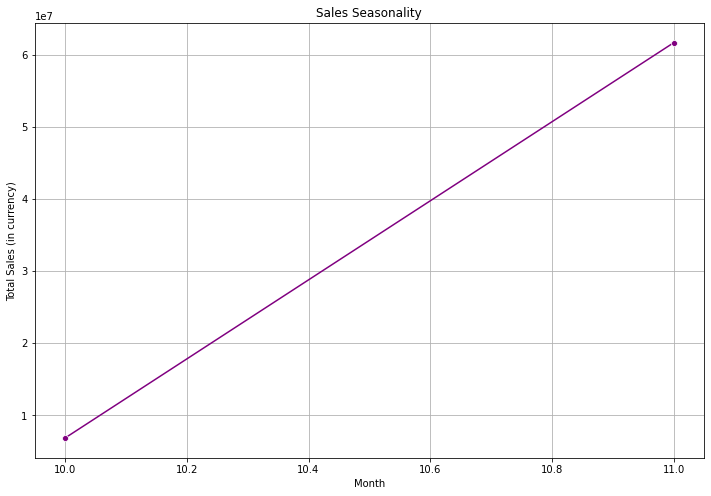

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='invoice_month', y='selling_price_per_unit', data=monthly_sales, marker='o', color='purple')
plt.title('Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Total Sales (in currency)')
plt.grid(True)
plt.show()

<h1> Customer Segmentation by Age Group

In [43]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
sales_by_age_group = df.groupby('age_group', observed=True)['selling_price_per_unit'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format
sales_by_age_group

,age_group,selling_price_per_unit
0,19-25,"9,160,709.69"
1,26-35,"13,089,584.64"
2,36-45,"13,584,504.96"
3,46-55,"13,206,068.93"
4,56-65,"13,010,651.30"
5,65+,"6,499,846.39"


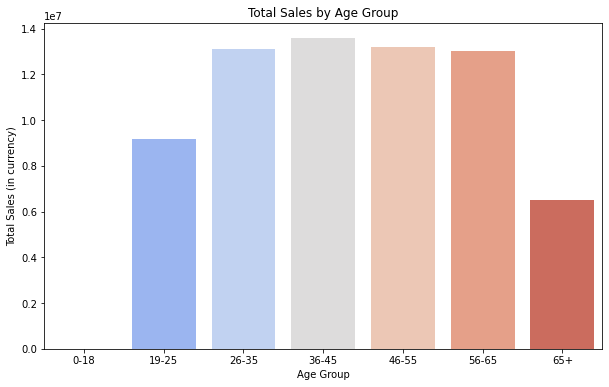

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='selling_price_per_unit', data=sales_by_age_group, palette='coolwarm')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (in currency)')
plt.show()

<h1> Churn Prediction Indicators

In [45]:
last_purchase = df.groupby('customer_id')['invoice_date'].max().reset_index()
last_purchase['days_since_last_purchase'] = (df['invoice_date'].max() - last_purchase['invoice_date']).dt.days

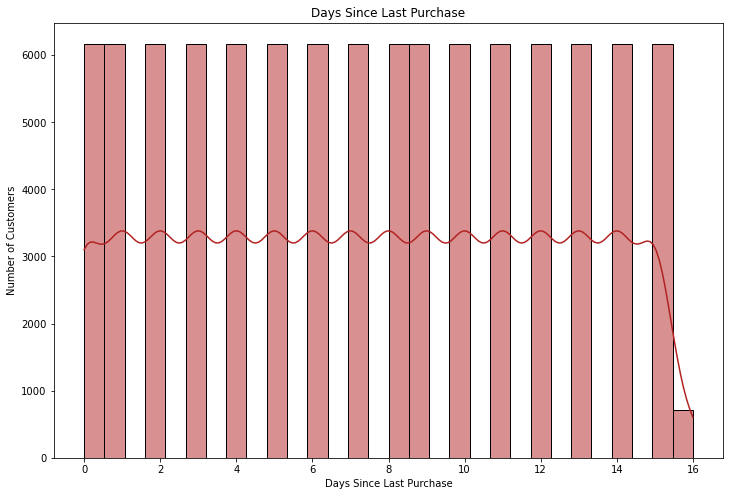

In [46]:
plt.figure(figsize=(12, 8))
sns.histplot(last_purchase['days_since_last_purchase'], bins=30, kde=True, color='firebrick')
plt.title('Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()